【回顾&引言】前面一章的内容大家可以感觉到我们主要是对基础知识做一个梳理，让大家了解数据分析的一些操作，主要做了数据的各个角度的观察。那么在这里，我们主要是做数据分析的流程性学习，主要是包括了数据清洗以及数据的特征处理，数据重构以及数据可视化。这些内容是为数据分析最后的建模和模型评价做一个铺垫。

#### 开始之前，导入numpy、pandas包和数据

In [55]:
#加载所需的库
import numpy as np
import pandas as pd

In [87]:
#加载数据train.csv
df = pd.read_csv('train.csv')
df
#Cabin 存在缺失数据，影响数据分析

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 任务一：缺失值观察

In [ ]:
#查看缺失值的个数

In [90]:
#法一：
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [91]:
#法二：具体哪些值缺失
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()#缺失值个数

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
# 查看列
df[['Age','Cabin','Embarked']]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


## 任务2：处理缺失值

In [ ]:
#法一：删除含有缺失值的列或行
df.dropna()

In [59]:
#法二：补入缺失值
df1 = df.fillna({'Age':0})  #df本身没有变，变得是副本
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
注：

In [ ]:
test.fillna(0)   #将所有缺失值填充为0

In [ ]:
test.fillna(method='ffill')  #向后填充，用前一个数补缺失值

In [28]:
# 法三：loc[行，列名]，Age列中为空的补0
df.loc[df['Age'].isnull(),'Age']=0
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age bins         1
Age bin         89
dtype: int64

In [ ]:
# 对整张表的缺失值进行处理

In [36]:
df = df.fillna(0)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 2.2 重复数据值的处理

In [10]:
#显示重复行
df[df.duplicated()]  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# df.duplicated()  #返回布尔型数据，显示位置

In [ ]:
# 删除重复行
df.drop_duplicates()

In [ ]:
## 将清洗的数据保存

In [ ]:
df.to_csv('')

## 特征观察及处理

In [ ]:
数值型特征：
    离散型数据特征
    连续性数据特征
文本型特征：可以直接用于模型训练，有时为了稳定性需要进行离散化

文本特征往往需要转换成数值特征，才能进行建模分析

In [ ]:
任务一：离散化（分箱处理）

In [ ]:
分箱处理：

In [12]:
#平均分为5个年龄段
df['Age bins']=pd.cut(df['Age'],5,labels = list('12345'))#数据必须是一维的，数据分成5段或定义具体的区间，labels是给每段取一个名字
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


(array([227.,  33., 164., 181., 123.,  74.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

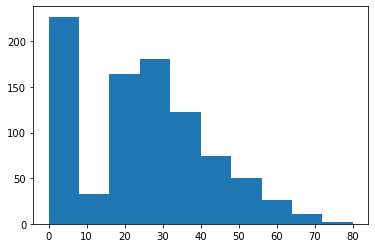

In [14]:
from matplotlib import pyplot as plt
plt.hist(df['Age'])

In [ ]:
# 划分为【0，5），【5，15）等5个年龄段

In [15]:
df['Age bins']=pd.cut(df['Age'],[0,5,15,30,50,80],right = False)#数据必须是一维的，数据分成5段或定义具体的区间，默认是左开右闭，labels是给每段取一个名字
df.head()#一共最大的年龄就是80 ，一共是5段

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"[15, 30)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"[30, 50)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"[15, 30)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"[30, 50)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"[30, 50)"


In [219]:
df['Age bins']=pd.cut(df['Age'],[0,5,15,30,50,80],right = False,labels = list('12345'))#数据必须是一维的，数据分成5段或定义具体的区间，默认是左开右闭，labels是给每段取一个名字
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age bins
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,3
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1.0,0.0,PC 17599,71.2833,C85,C,4
2,2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,3
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1.0,0.0,113803,53.1000,C123,S,4
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0.0,373450,8.0500,NaN,S,4


In [ ]:
# 年龄段按百分比分段，不以0开始或1结束时，只会对部分数据进行分箱

In [223]:
df['Age bins']=pd.qcut(df['Age'],[0,0.1,0.3,0.5,0.7,0.9],duplicates ='drop',labels=list('12345'))#分段的标签必须少于分段的边缘，本来分段的边缘是五个，一个重复的，所以是四个
df.head()
#每一段的边缘是唯一的，如果有重复的边缘的话用duplicates='drop'，数据中有重复的边缘值
#qcut能对有重复数值的数据进行分箱，保证相同的值在一个箱子中，但最后形成的分箱可能没有指定的分箱多。


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age bins
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,2
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1.0,0.0,PC 17599,71.2833,C85,C,5
2,2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,3
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1.0,0.0,113803,53.1000,C123,S,4
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0.0,373450,8.0500,NaN,S,4


In [ ]:
# cut 是按照变量的值进行划分，qcut是按照变量的个数进行划分

# 任务:对文本变量进行转换

In [47]:
# 查看文本变量及种类
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [93]:
df['Cabin'].unique()#仓号

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [49]:
df['Embarked'].unique()  #港口

array(['S', 'C', 'Q', nan], dtype=object)

In [50]:
# 文本变量转为数值变量

In [214]:
#  replace函数（有inplace）直接作用于函数其本身
df['Sex'].replace(['male','female'],[1,2],inplace = True)
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1.0,0.0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,447,887,0,2,"Montvila, Rev. Juozas",1,27.0,0.0,0.0,211536,13.0000,NaN,S
887,448,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0.0,0.0,112053,30.0000,B42,S
888,449,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S
889,450,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0.0,0.0,111369,30.0000,C148,C


In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## astype 什么时候用？？？

In [96]:
from sklearn.preprocessing import LabelEncoder
df['Cabin'] = LabelEncoder().fit_transform(df['Cabin'].astype(str))  #可以直接把文本变量变为数值变量
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,147,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,81,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,147,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,55,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,147,S


In [97]:
from sklearn.preprocessing import LabelEncoder
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'].astype(str))  #可以直接把文本变量变为数值变量
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,147,2


In [ ]:
# 用one-hot编码表示

In [ ]:
one-hot编码：
不可比较，转为one-hot

In [74]:
x = pd.get_dummies(df['Age'],prefix = 'Age')
x

,Age_0.42,Age_0.67,Age_0.75,Age_0.83,Age_0.92,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,...,Age_62.0,Age_63.0,Age_64.0,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df = pd.concat([df,x],axis=1)  #把df和x按列拼接
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_62.0,Age_63.0,Age_64.0,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,0,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,0,0,0,0,0,0,0


In [77]:
for columns in ['Cabin','Embarked']:
    x = pd.get_dummies(df[columns],prefix = columns)#对这两列进行编码，编码后的前缀还是原先的列名
    df = pd.concat([df,x],axis=1)#进行拼接
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,1


## 任务：

In [ ]:
从文本names中提取特征(mr,mrs,miss等)

In [80]:
df.Name
#可能需要用到正则表达式

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [ ]:
#需要用到Series的字符串提取函数

In [85]:
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,0,0,0,0,0,0,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,0,0,0,0,0,0,0,1,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,0,0,0,1,0,0,Mr


# 数据重构

In [101]:
left_up = pd.read_csv('data/train-left-up.csv')
left_down = pd.read_csv('data/train-left-down.csv')
right_up = pd.read_csv('data/train-right-up.csv')
right_down = pd.read_csv('data/train-right-down.csv')

In [102]:
left_up.head()

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"


In [103]:
left_down.head()

,PassengerId,Survived,Pclass,Name
0,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson"
1,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)"
2,442,0,3,"Hampe, Mr. Leon"
3,443,0,3,"Petterson, Mr. Johan Emil"
4,444,1,2,"Reynaldo, Ms. Encarnacion"


In [104]:
right_up.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,female,35.0,1,0,113803,53.1000,C123,S
4,male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
right_down.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,male,31.0,0,0,C.A. 18723,10.500,NaN,S
1,female,45.0,1,1,F.C.C. 13529,26.250,NaN,S
2,male,20.0,0,0,345769,9.500,NaN,S
3,male,25.0,1,0,347076,7.775,NaN,S
4,female,28.0,0,0,230434,13.000,NaN,S


# 任务二：

In [106]:
#法一：
#横向合并并保存

In [109]:
result_up =  pd.concat([left_up,right_up],axis=1)
result_up

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S


In [215]:
result_down =  pd.concat([left_down,right_down],axis=1)
result_down

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.500,NaN,S
1,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.250,NaN,S
2,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.500,NaN,S
3,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.775,NaN,S
4,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
447,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
448,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
449,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
450,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C


In [112]:
#纵向相连
result = pd.concat([result_up,result_down])
result

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
447,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
448,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
449,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
450,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#法二：append纵向合并；join  横向合并

In [114]:
up =left_up.join(right_up) 
down = left_down.join(right_down)
result =up.append(down)
result

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
447,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
448,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
449,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
450,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#法三：merge(横向合并列)
默认用一列两个dataframe都有的列来拼接，在这需要改成行索引拼接

In [115]:
up = pd.merge(left_up,right_up,left_index= True,right_index = True)
up

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.7500,NaN,S


In [ ]:
## 方法的不同和相同：
concat和append:默认使用纵向链接，concat也可以横向链接（axis= 1）
join   merge：只能用来横向链接

### 将dataframe数据转为Series类型的数据

In [ ]:
stack会把数据的列旋转为行

In [117]:
#数据重构的第一部分完成
data_unit = result.stack()
data_unit.head()

0  PassengerId                          1
   Survived                             0
   Pclass                               3
   Name           Braund, Mr. Owen Harris
   Sex                               male
dtype: object

In [127]:
df = pd.read_csv('result.csv')
df.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C


In [ ]:
# groupby 主要用于数据的聚合和分类计算，其思想是差分-应用-合并

In [ ]:
#计算男女的平均票价

In [128]:
list(df.groupby('Sex'))[0]

('female',
      Unnamed: 0  PassengerId  Survived  Pclass  \
 1             1            2         1       1   
 2             2            3         1       3   
 3             3            4         1       1   
 8             8            9         1       3   
 9             9           10         1       2   
 ..          ...          ...       ...     ...   
 880         441          881         1       2   
 882         443          883         0       3   
 885         446          886         0       3   
 887         448          888         1       1   
 888         449          889         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
 2                               Heikkinen, Miss. Laina  female  26.0    0.0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
 8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)

In [129]:
group = df.groupby('Sex')
group.describe()

Unnamed: 0                                                            \
            count        mean         std  min    25%    50%     75%    max   
Sex                                                                           
female      314.0  227.305732  132.683758  1.0  109.5  236.0  340.75  449.0   
male        577.0  219.571924  126.605257  0.0  112.0  219.0  330.00  451.0   

       PassengerId              ... Parch        Fare                        \
             count        mean  ...   75%  max  count       mean        std   
Sex                             ...                                           
female       314.0  431.028662  ...   1.0  6.0  314.0  44.479818  57.997698   
male         577.0  454.147314  ...   0.0  5.0  577.0  25.523893  43.138263   

                                                
         min        25%   50%    75%       max  
Sex                                             
female  6.75  12.071875  23.0  55.00  512.3292  
male    0.00   7.895800  10.5  26.55  512.3292  

[2 rows x 64 columns]

In [130]:
#只想得到年龄
df.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [131]:
# 只需要年龄的平均值
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [145]:
mean_fare_sex = df.groupby('Sex')['Fare'].mean()

In [146]:
# 男女存活人数
survived_sex = df.groupby('Sex')['Survived'].sum()

In [ ]:
# 不同等级的存活人数

In [134]:
#法一：
df.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [135]:
#法二：
df.groupby('Pclass')['Survived'].agg('sum')

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [ ]:
agg可以同时使用多个方法，

In [140]:
df.groupby('Sex').agg({'Survived':'sum','Fare':'mean'}).rename(columns = {'Survived':'Survived_sum','Fare':'Fare_mean'})
#goupby用来聚合，agg用来使用多个方法

,Survived_sum,Fare_mean
Sex,,
female,233,44.479818
male,109,25.523893


In [ ]:
# 任务五：不同等级不同年龄的船票平均值

In [152]:
a = df.groupby(['Pclass','Age']).agg({'Fare':'mean'})
a

Fare
Pclass Age            
1      0.92   151.5500
       2.00   151.5500
       4.00    81.8583
       11.00  120.0000
       14.00  120.0000
...                ...
3      61.00    6.2375
       63.00    9.5875
       65.00    7.7500
       70.50    7.7500
       74.00    7.7750

[182 rows x 1 columns]

In [147]:
mean_fare_sex.index

Index(['female', 'male'], dtype='object', name='Sex')

In [148]:
survived_sex.index

Index(['female', 'male'], dtype='object', name='Sex')

In [ ]:
#法一：
mean_fare_sex=mean_fare_sex.to_frame()
survived_sex=survived_sex.to_frame()

In [151]:
#两者的索引相同,可以用merge函数,merge函数要求是dataframe数据
pd.merge(mean_fare_sex,survived_sex,on='Sex')

,Fare,Survived
Sex,,
female,44.479818,233
male,25.523893,109


In [153]:
#法二：
df.groupby('Sex').agg({'Survived':'sum','Fare':'mean'})

,Survived,Fare
Sex,,
female,233,44.479818
male,109,25.523893


In [ ]:
##得出不同年龄总的存活人数

In [157]:
survived_sum = df.groupby('Age').agg({'Survived':'sum'})
survived_sum

,Survived
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,0
70.50,0
71.00,0


In [159]:
max(survived_sum)

'Survived'

In [163]:
survived_age = df.groupby('Age')['Survived'].sum()
survived_age

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    0
70.50    0
71.00    0
74.00    0
80.00    1
Name: Survived, Length: 88, dtype: int64

In [164]:
#计算存货人数的最高的年龄
max(survived_age)

15

In [165]:
survived_age.head(2)

Age
0.42    1
0.67    1
Name: Survived, dtype: int64

In [167]:
survived_age[survived_age.values ==max(survived_age)]## 用索引查找年龄

Age
24.0    15
Name: Survived, dtype: int64

In [ ]:
#计算存活人数最高的存活率


In [168]:
#总的存活人数
sum(df['Survived'])

342

In [169]:
'最大存活率：{}'.format(max(survived_age)/sum(df['Survived']))

'最大存活率：0.043859649122807015'

# 数据可视化

In [170]:
import matplotlib.pyplot as plt

In [171]:
df= pd.read_csv('result.csv')
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,447,887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,NaN,S
887,448,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,B42,S
888,449,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2.0,W./C. 6607,23.4500,NaN,S
889,450,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C148,C


In [ ]:
#柱状图展示男女生存人数分布情况

In [173]:
sex = df.groupby('Sex')['Survived'].sum()
sex

Sex
female    233
male      109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'survived')

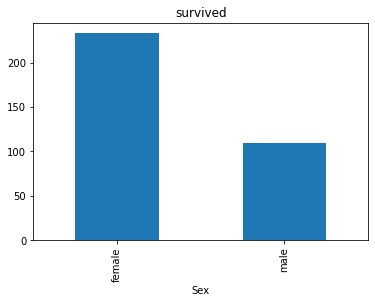

In [175]:
sex.plot.bar()    # bar是什么
plt.title('survived')

In [ ]:
# 计算男女死亡人数：数据中1表示生存，0表示死亡

In [ ]:
## agg聚合和另一种方法有什么区别

In [216]:
sex_survived = df.groupby(['Sex','Survived'])['Survived'].count()
#unstack:旋转
sex_survived

Sex  Survived
1    0           468
     1           109
2    0            81
     1           233
Name: Survived, dtype: int64

In [217]:
sex_survived = df.groupby(['Sex','Survived'])['Survived'].count().unstack()
#unstack:旋转
sex_survived

Survived,0,1
Sex,,
1,468,109
2,81,233


Text(0.5, 1.0, 'died')

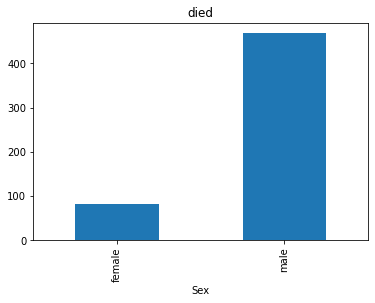

In [182]:
died = sex_survived[0]
died.plot.bar()
plt.title('died')

In [ ]:
#男女生存与死亡人数的比例图

<AxesSubplot:xlabel='Sex'>

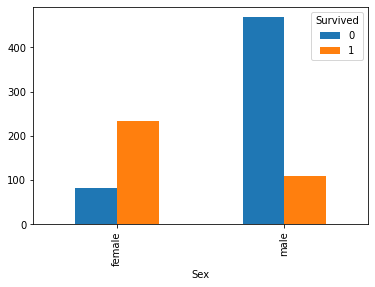

In [183]:
sex_survived.plot.bar()

<AxesSubplot:xlabel='Sex'>

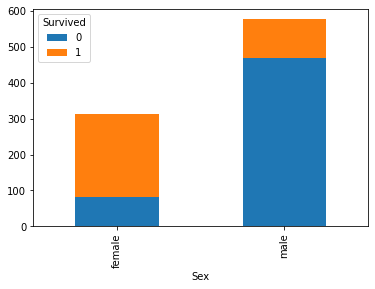

In [184]:
sex_survived.plot(kind='bar',stacked = 'True')#stack把两者数量叠加
#数量叠加

In [ ]:
# 用折线图展示不同人的生存死亡人数

In [185]:
fare=df.groupby(['Fare','Survived'])['Survived'].count().unstack()
fare

Survived,0,1
Fare,,
0.0000,14.0,1.0
4.0125,1.0,NaN
5.0000,1.0,NaN
6.2375,1.0,NaN
6.4375,1.0,NaN
...,...,...
227.5250,1.0,3.0
247.5208,1.0,1.0
262.3750,NaN,2.0


<AxesSubplot:xlabel='Fare'>

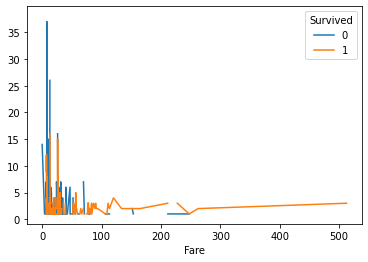

In [186]:
fare.plot()
#plot默认是折线图

In [ ]:
#不同舱位等级的人生死存亡人数

In [187]:
pclass = df.groupby(['Pclass','Survived'])['Survived'].count().unstack()
pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Pclass'>

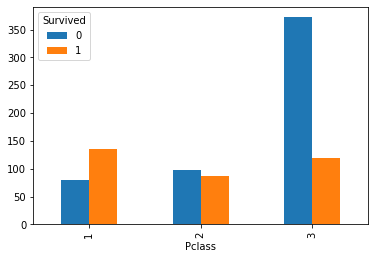

In [188]:
pclass.plot.bar()

In [ ]:
#不同年龄的死亡生存人数:先把年龄分为5段，画一个直方图，看生存失望人数

Text(0, 0.5, 'count')

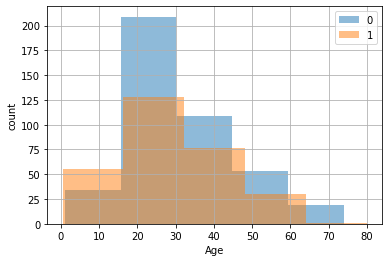

In [195]:
df.Age[df.Survived == 0].hist(bins=5,alpha = 0.5)  #死亡时刻的年龄
df.Age[df.Survived == 1].hist(bins=5,alpha = 0.5)
plt.legend((0,1))                                  #图例
plt.xlabel('Age')
plt.ylabel('count')

In [ ]:
#根据分布密度画一个直方图，加参数即可

Text(0, 0.5, 'density')

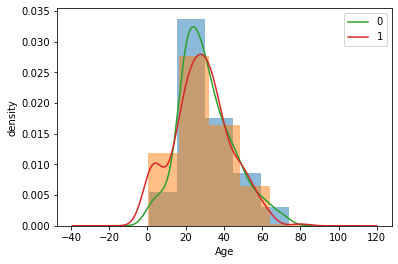

In [200]:
df.Age[df.Survived == 0].hist(bins=5,alpha = 0.5,density=1)  #死亡时刻的年龄
df.Age[df.Survived == 1].hist(bins=5,alpha = 0.5,density=1)
df.Age[df.Survived == 0].plot.density()
df.Age[df.Survived == 1].plot.density()       #密度曲线
plt.legend((0,1))                                  #图例
plt.xlabel('Age')
plt.ylabel('density')

In [ ]:
# 不同仓位人的情况

<AxesSubplot:ylabel='Density'>

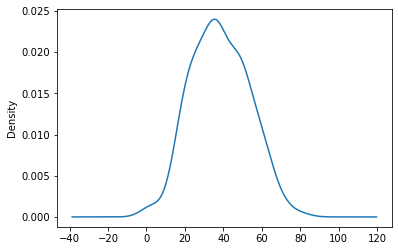

In [201]:
df.Age[df.Pclass == 1].plot.density()

In [206]:
unique_pclass = df.Pclass.unique()
unique_pclass.sort()
unique_pclass

array([1, 2, 3], dtype=int64)

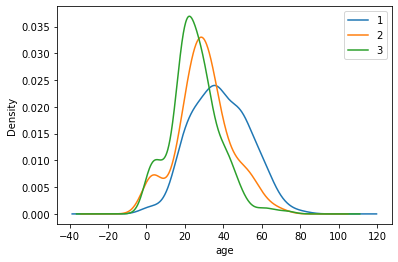

In [210]:
for i in unique_pclass:
    df.Age[df.Pclass == i].plot.density()
plt.xlabel('age')
plt.legend(unique_pclass)

In [211]:
import  seaborn as sns

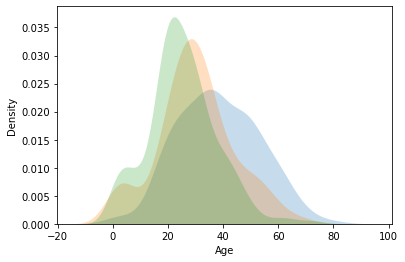

In [213]:
for i in unique_pclass:
    sns.kdeplot(df.Age[df.Pclass ==i],shade =True,linewidth=0)

## 2 第二章：数据清洗及特征处理
我们拿到的数据通常是不干净的，所谓的不干净，就是数据中有缺失值，有一些异常点等，需要经过一定的处理才能继续做后面的分析或建模，所以拿到数据的第一步是进行数据清洗，本章我们将学习缺失值、重复值、字符串和数据转换等操作，将数据清洗成可以分析或建模的亚子。

### 2.1 缺失值观察与处理
我们拿到的数据经常会有很多缺失值，比如我们可以看到Cabin列存在NaN，那其他列还有没有缺失值，这些缺失值要怎么处理呢

#### 2.1.1 任务一：缺失值观察
(1) 请查看每个特征缺失值个数  
(2) 请查看Age， Cabin， Embarked列的数据
以上方式都有多种方式，所以大家多多益善

In [ ]:
#写入代码




In [ ]:
#写入代码




In [ ]:
#写入代码




#### 2.1.2 任务二：对缺失值进行处理
(1)处理缺失值一般有几种思路

(2) 请尝试对Age列的数据的缺失值进行处理

(3) 请尝试使用不同的方法直接对整张表的缺失值进行处理  


In [ ]:
#处理缺失值的一般思路：
#提醒：可使用的函数有--->dropna函数与fillna函数




In [ ]:
#写入代码




In [ ]:
#写入代码




In [ ]:
#写入代码




【思考1】dropna和fillna有哪些参数，分别如何使用呢?  

【思考】检索空缺值用`np.nan`,`None`以及`.isnull()`哪个更好，这是为什么？如果其中某个方式无法找到缺失值，原因又是为什么？

In [1]:
#思考回答




【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

### 2.2 重复值观察与处理
由于这样那样的原因，数据中会不会存在重复值呢，如果存在要怎样处理呢

#### 2.2.1 任务一：请查看数据中的重复值

In [ ]:
#写入代码




#### 2.2.2 任务二：对重复值进行处理
(1)重复值有哪些处理方式呢？

(2)处理我们数据的重复值

方法多多益善

In [ ]:
#重复值有哪些处理方式：




In [ ]:
#写入代码




####  2.2.3 任务三：将前面清洗的数据保存为csv格式

In [ ]:
#写入代码




### 2.3 特征观察与处理
我们对特征进行一下观察，可以把特征大概分为两大类：  
数值型特征：Survived ，Pclass， Age ，SibSp， Parch， Fare，其中Survived， Pclass为离散型数值特征，Age，SibSp， Parch， Fare为连续型数值特征  
文本型特征：Name， Sex， Cabin，Embarked， Ticket，其中Sex， Cabin， Embarked， Ticket为类别型文本特征，数值型特征一般可以直接用于模型的训练，但有时候为了模型的稳定性及鲁棒性会对连续变量进行离散化。文本型特征往往需要转换成数值型特征才能用于建模分析。

#### 2.3.1 任务一：对年龄进行分箱（离散化）处理
(1) 分箱操作是什么？

(2) 将连续变量Age平均分箱成5个年龄段，并分别用类别变量12345表示  

(3) 将连续变量Age划分为[0,5) [5,15) [15,30) [30,50) [50,80)五个年龄段，并分别用类别变量12345表示  

(4) 将连续变量Age按10% 30% 50% 70% 90%五个年龄段，并用分类变量12345表示

(5) 将上面的获得的数据分别进行保存，保存为csv格式

In [ ]:
#分箱操作是什么：




In [ ]:
#写入代码




In [ ]:
#写入代码




In [ ]:
#写入代码




【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

【参考】https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

#### 2.3.2 任务二：对文本变量进行转换
(1) 查看文本变量名及种类  
(2) 将文本变量Sex， Cabin ，Embarked用数值变量12345表示  
(3) 将文本变量Sex， Cabin， Embarked用one-hot编码表示

In [ ]:
#写入代码




In [ ]:
#写入代码




In [ ]:
#写入代码




#### 2.3.3 任务三：从纯文本Name特征里提取出Titles的特征(所谓的Titles就是Mr,Miss,Mrs等)

In [ ]:
#写入代码




In [ ]:
#保存最终你完成的已经清理好的数据
